<a href="https://colab.research.google.com/github/anup-anny/Market-Basket-Analysis/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

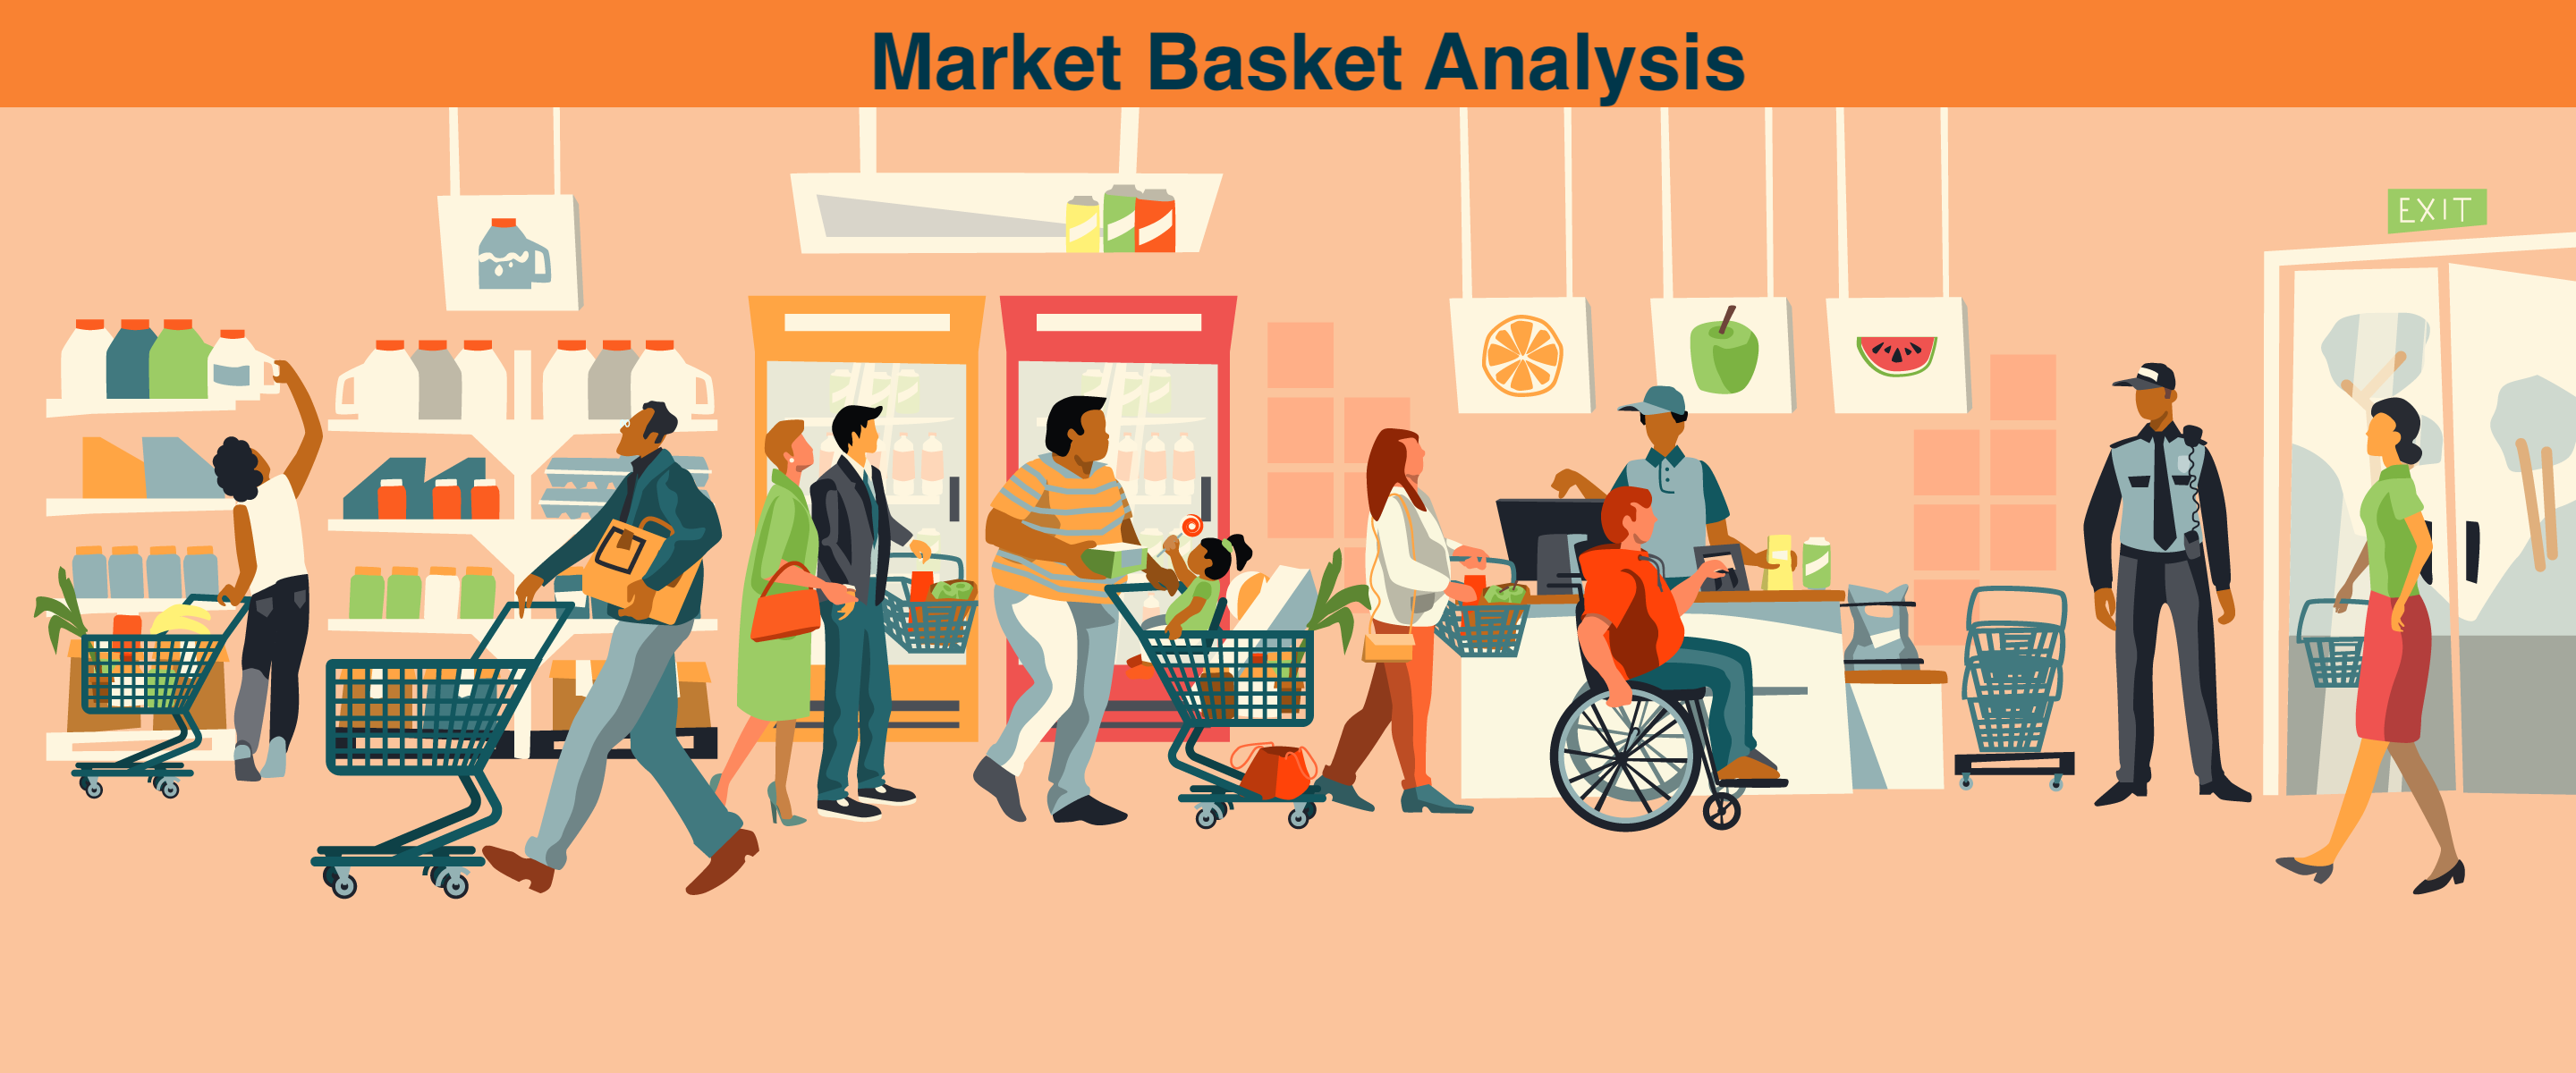

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/project case studies/Hineken/TransactionData.xlsx')

In [ ]:
df1 = df.copy()

In [ ]:
df

,Basket,item1,item2,item3,item4,item5,item6,item7,item8,item9,...,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20
0,B1,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,...,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,B2,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B3,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B4,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B5,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,B7497,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,B7498,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,B7499,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,B7500,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Basket  7501 non-null   object
 1   item1   7501 non-null   object
 2   item2   5747 non-null   object
 3   item3   4389 non-null   object
 4   item4   3345 non-null   object
 5   item5   2529 non-null   object
 6   item6   1864 non-null   object
 7   item7   1369 non-null   object
 8   item8   981 non-null    object
 9   item9   654 non-null    object
 10  item10  395 non-null    object
 11  item11  256 non-null    object
 12  item12  154 non-null    object
 13  item13  87 non-null     object
 14  item14  47 non-null     object
 15  item15  25 non-null     object
 16  item16  8 non-null      object
 17  item17  4 non-null      object
 18  item18  4 non-null      object
 19  item19  3 non-null      object
 20  item20  1 non-null      object
dtypes: object(21)
memory usage: 1.2+ MB


In [ ]:
df.describe(include ='all').T

,count,unique,top,freq
Basket,7501,7501,B1,1
item1,7501,115,mineral water,577
item2,5747,117,mineral water,484
item3,4389,115,mineral water,375
item4,3345,114,mineral water,201
item5,2529,110,green tea,153
item6,1864,106,french fries,107
item7,1369,102,green tea,96
item8,981,98,green tea,67
item9,654,88,green tea,57


In [ ]:
df.isnull().sum()

Basket       0
item1        0
item2     1754
item3     3112
item4     4156
item5     4972
item6     5637
item7     6132
item8     6520
item9     6847
item10    7106
item11    7245
item12    7347
item13    7414
item14    7454
item15    7476
item16    7493
item17    7497
item18    7497
item19    7498
item20    7500
dtype: int64

In [ ]:
df.fillna("", inplace=True)

In [ ]:
# df1 = df

In [ ]:
# df1['basket'] = (df1['item1']+' '+df1['item2']+' '+df1['item3']+' '+df1['item4']+' '+df1['item5']+' '+df1['item6']+' '+df1['item7']
#                 +' '+df1['item8']+' '+df1['item9']+' '+df1['item10']+' '+df1['item11']+' '+df1['item12']+' '+df1['item13']+' '+df1['item14']
#                 +' '+df1['item15']+' '+df1['item16']+' '+df1['item17']+' '+df1['item18']+' '+df1['item19']+' '+df1['item20'])

In [ ]:
# cluster_df = df1['basket']

In [ ]:
df.shape

(7501, 21)

In [ ]:
# making a list of items individual basket wise
T = []
for i in range(0, 7501):
    T.append([str(df.values[i,j]) for j in range(1, 20) if str(df.values[i,j])!=''])

In [ ]:
D = df.iloc[:,1:].values.ravel()

In [ ]:
D

array(['shrimp', 'almonds', 'avocado', ..., '', '', ''], dtype=object)

In [ ]:
import collections
val = collections.Counter(D)
val

Counter({'shrimp': 536,
         'almonds': 153,
         'avocado': 250,
         'vegetables mix': 193,
         'green grapes': 68,
         'whole weat flour': 70,
         'yams': 86,
         'cottage cheese': 239,
         'energy drink': 200,
         'tomato juice': 228,
         'low fat yogurt': 574,
         'green tea': 991,
         'honey': 356,
         'salad': 37,
         'mineral water': 1788,
         'salmon': 319,
         'antioxydant juice': 67,
         'frozen smoothie': 475,
         'spinach': 53,
         'olive oil': 494,
         'burgers': 654,
         'meatballs': 157,
         'eggs': 1348,
         '': 120657,
         'chutney': 31,
         'turkey': 469,
         'milk': 972,
         'energy bar': 203,
         'whole wheat rice': 439,
         'whole wheat pasta': 221,
         'french fries': 1282,
         'soup': 379,
         'light cream': 117,
         'shallot': 58,
         'frozen vegetables': 715,
         'spaghetti': 1306,
         

In [ ]:
val.items()

dict_items([('shrimp', 536), ('almonds', 153), ('avocado', 250), ('vegetables mix', 193), ('green grapes', 68), ('whole weat flour', 70), ('yams', 86), ('cottage cheese', 239), ('energy drink', 200), ('tomato juice', 228), ('low fat yogurt', 574), ('green tea', 991), ('honey', 356), ('salad', 37), ('mineral water', 1788), ('salmon', 319), ('antioxydant juice', 67), ('frozen smoothie', 475), ('spinach', 53), ('olive oil', 494), ('burgers', 654), ('meatballs', 157), ('eggs', 1348), ('', 120657), ('chutney', 31), ('turkey', 469), ('milk', 972), ('energy bar', 203), ('whole wheat rice', 439), ('whole wheat pasta', 221), ('french fries', 1282), ('soup', 379), ('light cream', 117), ('shallot', 58), ('frozen vegetables', 715), ('spaghetti', 1306), ('pet food', 49), ('cookies', 603), ('cooking oil', 383), ('champagne', 351), ('chocolate', 1230), ('chicken', 450), ('oil', 173), ('fresh tuna', 167), ('tomatoes', 513), ('black tea', 107), ('extra dark chocolate', 90), ('protein bar', 139), ('red 

In [ ]:
df = pd.DataFrame(val.items())
df

,0,1
0,shrimp,536
1,almonds,153
2,avocado,250
3,vegetables mix,193
4,green grapes,68
...,...,...
116,burger sauce,44
117,oatmeal,33
118,asparagus,1
119,cream,7


In [ ]:
df = df.rename(columns={0:'Items',1:'Total'})
df

,Items,Total
0,shrimp,536
1,almonds,153
2,avocado,250
3,vegetables mix,193
4,green grapes,68
...,...,...
116,burger sauce,44
117,oatmeal,33
118,asparagus,1
119,cream,7


In [ ]:
#This gives us maximum sold items, which can be very useful in our recommendation engine logic
top_selling_items=df.sort_values(by='Total',ascending=False)[1:21]
top_selling_items.style.background_gradient(cmap='Reds')

,Items,Total
14,mineral water,1788
22,eggs,1348
35,spaghetti,1306
30,french fries,1282
40,chocolate,1230
11,green tea,991
26,milk,972
62,ground beef,737
34,frozen vegetables,715
56,pancakes,713


In [ ]:
from wordcloud import WordCloud
text_for_WC=" ".join(D)

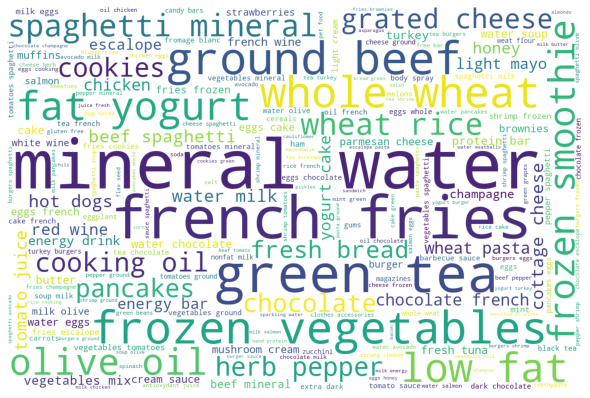

In [ ]:
wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(text_for_WC)

# Display the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# **MBA by Apriori algorithim**

In [ ]:
pip install apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(T).transform(T)
matrix = pd.DataFrame(te_ary, columns=te.columns_)
matrix

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori
# for 20% support note there is no item having support of 23%
apriori(matrix, min_support=0.2)

,support,itemsets
0,0.238368,(72)


In [ ]:
apriori(matrix, min_support=0.1)  # for 10%

,support,itemsets
0,0.163845,(25)
1,0.179709,(37)
2,0.170911,(43)
3,0.132116,(54)
4,0.129583,(71)
5,0.238368,(72)
6,0.174110,(100)


In [ ]:
apriori(matrix, min_support=0.03, use_colnames=True)  # at this threshold i am able to find descent combinations

,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


In [ ]:
frequent_itemsets = apriori(matrix, min_support=0.03, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values(by = 'support',ascending = False)

,support,itemsets,length
25,0.238368,(mineral water),1
11,0.179709,(eggs),1
31,0.174110,(spaghetti),1
13,0.170911,(french fries),1
7,0.163845,(chocolate),1
18,0.132116,(green tea),1
24,0.129583,(milk),1
19,0.098254,(ground beef),1
16,0.095321,(frozen vegetables),1
27,0.095054,(pancakes),1


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.04) ]

,support,itemsets,length
39,0.052660,"(mineral water, chocolate)",2
43,0.050927,"(mineral water, eggs)",2
48,0.040928,"(mineral water, ground beef)",2
50,0.047994,"(mineral water, milk)",2
53,0.059725,"(mineral water, spaghetti)",2


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'shrimp'} ]

,support,itemsets,length
29,0.071457,(shrimp),1


In [ ]:
from apyori import apriori
rules = apriori(T,min_support = 0.003,min_confidence=0.35, min_lift=3,min_length=2)
results = list(rules)

In [ ]:
for i in results:
  print()
  print(i)
  print('-------------------------------------------------------------------------------------------')


RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)])
-------------------------------------------------------------------------------------------

RelationRecord(items=frozenset({'tomato sauce', 'ground beef'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomato sauce'}), items_add=frozenset({'ground beef'}), confidence=0.3773584905660377, lift=3.840659481324083)])
-------------------------------------------------------------------------------------------

RelationRecord(items=frozenset({'spaghetti', 'milk', 'avocado'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'spaghetti', 'avocado'}), items_add=frozenset({'milk'}), confidence=0.41666666666666663, lift=3.215449245541838)])
-----------------------------

In [ ]:
# above results says The top 3 recommended products for shrimp.
# RelationRecord(items=frozenset({'mineral water', 'shrimp', 'frozen vegetables', 'spaghetti'}), support=0.003332888948140248

In [ ]:
# lets build recommendor system

In [ ]:
pivot_table = matrix.replace({True:1,False:0})
pivot_table

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Calculate the co-occurrence matrix
item_affinity = pivot_table.T.dot(pivot_table)

# Set the diagonal to zero (items don't co-occur with themselves)
np.fill_diagonal(item_affinity.values, 0)

# Normalize the matrix by the number of transactions
item_affinity = item_affinity / item_affinity.values.sum()

In [ ]:
# Get the top N similar items to "avocado"
N = 5
similar_items = item_affinity.loc['avocado'].sort_values(ascending=False)[1:N+1]
similar_items

french fries    0.000403
spaghetti       0.000403
milk            0.000376
chocolate       0.000356
green tea       0.000316
Name: avocado, dtype: float64

In [ ]:
# Compute item-item correlation matrix
item_corr = np.corrcoef(pivot_table.T)
np.fill_diagonal(item_corr, 0)  # Set diagonal values to 0

# Find the pair of items with maximum correlation
max_corr = item_corr.max()
max_corr_indices = np.unravel_index(item_corr.argmax(), item_corr.shape)
item1, item2 = pivot_table.columns[max_corr_indices[0]], pivot_table.columns[max_corr_indices[1]]

print(f"The pair of items with maximum correlation are '{item1}' and '{item2}' with a correlation of {max_corr:.2f}") 

The pair of items with maximum correlation are 'ground beef' and 'spaghetti' with a correlation of 0.20


In [ ]:
def recommend_items(df, item, num_recommendations):
    # Get the column index of the given item
    item_index = df.columns.get_loc(item)
    
    # Get the row indices of customers who have bought the given item
    customer_indices = df.index[df.iloc[:, item_index] == 1].tolist()
    
    # Compute the sum of all columns for the selected customers
    customer_sum = df.loc[customer_indices].sum(axis=0)
    
    # Sort the sums in descending order and get the indices of the top n items
    recommended_item_indices = customer_sum.sort_values(ascending=False).index[1:num_recommendations+1]
    
    # Return the recommended items
    # recommended_items = df[recommended_item_indices]
    # return recommended_items
    return recommended_item_indices

In [ ]:
recommend_items(pivot_table,'shrimp',3)

Index(['mineral water', 'spaghetti', 'chocolate'], dtype='object')